### 합성곱 신경망과 딥러닝
##### 1. 구조
- 기존 신경망
    - fully-connected
    - Affine 계층 사용
- CNN
    - **convolution layer**
        - convolution layer은 형상을 유지 (3차원 → 3차원)
        - 입출력 데이터를 feature map 이라고 함 (input/output feature map)
        - 필터(커널) 연산
    - **pooling layer**

##### 2 합성곱 계층(convolution layer)
- 편향 : 필터를 적용 후 더함
- 패딩(padding)
    - 입력 데이터 주변을 특정 값으로 채움(ex. 0)
    - 출력 크기를 조정할 목적으로 사용
- 스트라이드(stride)
    - 윈도우를 stride만큼 이동
- 합성곱 연산 시 **입력 데이터의 채널 수와 필터의 수가 같아야 함**

##### 3. 풀링 계층(pooling layer)
- 세로, 가로 방향의 공간을 줄이는 연산
- 2*2의 최대 풀링(max pooling)을 stride 2로 처리하는 순서
- 학습해야 할 매개변수가 없다
- 채널 수가 변하지 않는다
- 입력의 변화에 영향을 적게 받는다

### 텐서(Tensor)
- 스칼라(0D tensor)
- 벡터(1D tensor)
- 행렬(2D tensor)
- 시계열데이터(3D tensor) - (samples, timestamps, features)
- 이미지(4D tensor) - (samples, height, width, channels)
- 동영상(5D tensor) - (samples, frames, height, width, channels)

### [Keras](https://talkingaboutme.tistory.com/844)
- tensorflow에 비해 코드 최소화 및 객관적 표현에 초점
- Sequential model vs Functional API
    - Sequential model : layer를 순차적으로 쌓는 모델
    - Functional API     : 다중 출력, 비순환 그래프 모델, 레이어 공유 등 복잡한 구조의 모델 정의에 활용 

In [1]:
## $pip install tensorflow
## $conda install scipy
## $pip install keras
## $pip install h5py

# sequential model ex
# 생성할 신경망 모델 구조
from keras.models import Sequential
model = Sequential()
# Using TensorFlow backend. : 정상 설치 문구

Using TensorFlow backend.


##### 신경망 레이어
- Dense
- Activation
- Dropout
- BachNormalization
- Convolution2D
- Maxpooling2D
- LSTM, SimpleRNN, GRU

##### 기초 함수
1. Dense의 입력 및 출력
    - output_dim : 출력 개수
    - input_dim : 입력 개수
    - input_shape : 입력 형상
2. Activation 함수
    - softmax
    - relu
    - tahn
    - sigmoid
    - hard_sigmoid
3. Optimizer 함수
    - SGD
    - RMSprop
    - Adam
    - Adadelta
    - Adamax
    - Nadam
4. loss 함수
    - mean_squared_error
    - binary_crossentropy
    - categorical_crossentropy
    - sparse_categorical_crossentropy

**모델 학습 (model.fit())**
- x : 입력 데이터
- y : 출력 데이터
- batch_size : 배치크기
- nb_epoch : 학습 epoch 횟수
- validation_split : 0~1사이 실수 (검증 용도로 사용할 데이터 비율)
- validation_data(x, y) : 검증 데이터
- shuffle : epoch마다 샘플 섞을 지 여부
- verbose : 0(없음), 1(진행바), 2(epoch 당)

**모델 평가 : model.evaluate()**
- x : 테스트 입력 데이터
- y : 테스트 출력 데이터
- loss, acc 값 출력

**모델 예측 : model.predict()**

**모델 정보 : model.summary()**

60000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 398us/step - loss: 0.2782 - acc: 0.9159 - val_loss: 0.1173 - val_acc: 0.9644
Epoch 2/10
50000/50000 [==============================] - 21s 413us/step - loss: 0.1131 - acc: 0.9657 - val_loss: 0.0887 - val_acc: 0.9710
Epoch 3/10
50000/50000 [==============================] - 22s 438us/step - loss: 0.0786 - acc: 0.9751 - val_loss: 0.0808 - val_acc: 0.9742
Epoch 4/10
50000/50000 [==============================] - 19s 380us/step - loss: 0.0581 - acc: 0.9811 - val_loss: 0.0730 - val_acc: 0.9789
Epoch 5/10
50000/50000 [==============================] - 19s 384us/step - loss: 0.0480 - acc: 0.9840 - val_loss: 0.0792 - val_acc: 0.9780
Epoch 6/10
50000/50000 [==============================] - 20s 397us/step - loss: 0.0424 - acc: 0.9862 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 7/10
50000/50000 [==============================] - 21s 421us/step - lo

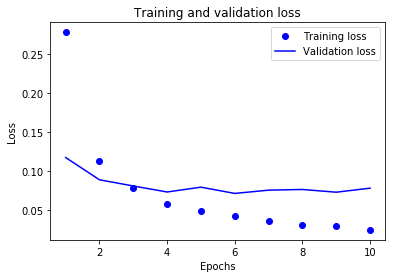

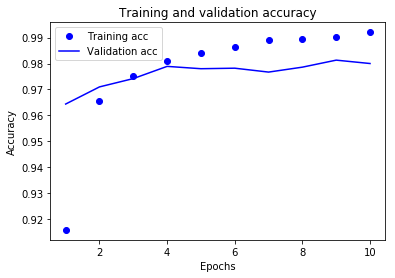

In [10]:
#Lab 1

import keras
from keras.datasets import mnist #mnist data 가져오기
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 데이터 전처리 ###
x_train = x_train.reshape(60000, 784) #28*28 > 784
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 구조 정의 ###
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

### 학습 ###
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
history = model.fit(partial_x_train, partial_y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(model.summary())

# graph

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
### 보스턴 주택 가격 예측하기
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

num_epochs = 20
bath_size = 1

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
train_data.shape
test_data.shape
train_targets

# 데이터 준비
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

val_data = train_data[:100]
partial_train_data = train_data[100:]
val_targets = train_targets[:100]
partial_train_targets = train_targets[100:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 학습 및 모델 평가 ##
history=model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=1,validation_data=(val_data,val_targets))

score = model.evaluate(test_data, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(model.summary())

#graph
train_mae = history.history['mean_absolute_error']
train_loss = history.history['loss']
val_mae = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']

epochs = range(1, len(train_mae) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, train_loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epochs, train_mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()